In [1]:
import mysql.connector
import pandas as pd
from IPython import display  
import matplotlib.pyplot as plt
import seaborn as sns

### Nivell 1
- Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

+ amb mySQL workbench creo un model amb dues taules "cars" i "shops" que contenen les dades


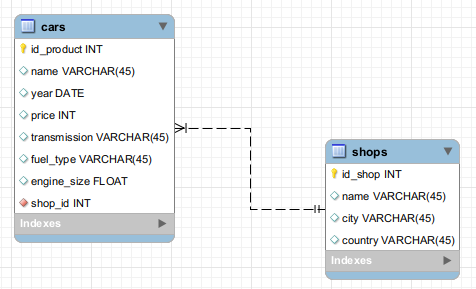

In [2]:
image_url = "S17T02_ex1.png"
display.Image(image_url,height= 400, width = 400)

+ creo una conexio amb la base de dades

In [3]:
mydb = mysql.connector.connect(
    host = 'localhost',    
    user = 'manel',
    password = 'itacademy',
    database="mydb")

print(mydb)

+ creo el objecte mycursor amb el metode cursor() a la meva conexió a la base de dades

In [4]:
mycursor = mydb.cursor()

print(mycursor)

CMySQLCursor: (Nothing executed yet)


+ ara ja puc escriure comandes per interaccionar amb la BBDD

In [5]:
sql_query = 'SHOW TABLES'
mycursor.execute(sql_query)

for x in mycursor:
  print(x) 

('hyundai_cars',)
('shops',)


In [6]:
# executo una comanda de SQL language
sql_query = 'SELECT * FROM shops'
mycursor.execute(sql_query)

In [7]:
# miro tot el que em retorna
myresult = mycursor.fetchall()
for x in myresult:
  print(x)

(1, 'cotxes_gaudi', 'Barcelona', 'Spain')
(2, 'lulu_voitures', 'Paris ', 'France')
(3, 'auto_van_gogh', 'Amsterdam', 'Netherlands')
(4, 'picolinos_auto', 'Rome', 'Italy')
(5, 'Bernies_car', 'London', 'UK')
(6, 'wundabar_autos', 'Berlin', 'Germany')


In [8]:
# executo una comanda de SQL language
sql_query = 'SELECT * FROM hyundai_cars LIMIT 10'
mycursor.execute(sql_query)
myresult = mycursor.fetchall()
print(myresult)

[(1, ' I20', 2017, 7999, 'Manual', 'Petrol', 1.2, 1), (2, ' Tucson', 2016, 14499, 'Automatic', 'Diesel', 2.0, 2), (3, ' Tucson', 2016, 11399, 'Manual', 'Diesel', 1.7, 3), (4, ' I10', 2016, 6499, 'Manual', 'Petrol', 1.0, 4), (5, ' IX35', 2015, 10199, 'Manual', 'Diesel', 2.0, 5), (6, ' I10', 2015, 6149, 'Manual', 'Petrol', 1.0, 6), (7, ' I20', 2015, 6799, 'Manual', 'Petrol', 1.2, 1), (8, ' Tucson', 2016, 14199, 'Automatic', 'Diesel', 1.7, 2), (9, ' I30', 2018, 10399, 'Automatic', 'Petrol', 1.4, 3), (10, ' Tucson', 2016, 12163, 'Manual', 'Diesel', 1.7, 4)]


In [9]:
mycursor.execute("DESCRIBE hyundai_cars;")

myresult = mycursor.fetchall()
for x in myresult:
  print(x)

('id-product', b'int', 'YES', '', None, '')
('name', b'text', 'YES', '', None, '')
('year', b'int', 'YES', '', None, '')
('price', b'int', 'YES', '', None, '')
('transmission', b'text', 'YES', '', None, '')
('fuel_type', b'text', 'YES', '', None, '')
('engine_size', b'double', 'YES', '', None, '')
('shop', b'int', 'YES', '', None, '')


### Nivell 2

- Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

+ vaig a provar differents queries

In [10]:
# select specific car name type
sql_query ="SELECT * FROM hyundai_cars WHERE name LIKE '%I2%';"

df = pd.read_sql_query(sql_query,mydb)

df.head()

,id-product,name,year,price,transmission,fuel_type,engine_size,shop
0,1,I20,2017,7999,Manual,Petrol,1.2,1
1,7,I20,2015,6799,Manual,Petrol,1.2,1
2,13,I20,2015,6900,Manual,Petrol,1.2,1
3,22,I20,2015,7995,Manual,Petrol,1.2,4
4,35,I20,2017,11400,Automatic,Petrol,0.0,5


In [11]:
# select the whole table
sql_query = 'SELECT * FROM shops'
pd.read_sql_query(sql_query,mydb)

,id_shop,name,city,country
0,1,cotxes_gaudi,Barcelona,Spain
1,2,lulu_voitures,Paris,France
2,3,auto_van_gogh,Amsterdam,Netherlands
3,4,picolinos_auto,Rome,Italy
4,5,Bernies_car,London,UK
5,6,wundabar_autos,Berlin,Germany


In [12]:
# join both tables and order by YEAR
sql_query = '''SELECT car.name, car.year, car.price, car.transmission,
                shops.name,shops.country FROM hyundai_cars AS car
                INNER JOIN shops
                ON car.shop = shops.id_shop
                ORDER BY car.year ASC;'''


df = pd.read_sql_query(sql_query,mydb)

df.head()

,name,year,price,transmission,name,country
0,IX35,2011,6936,Manual,Bernies_car,UK
1,IX35,2011,7799,Automatic,lulu_voitures,France
2,IX35,2012,5000,Manual,cotxes_gaudi,Spain
3,Veloster,2012,6300,Manual,lulu_voitures,France
4,I10,2012,3799,Manual,Bernies_car,UK


In [13]:
# join tables and count the stock of cars for a given type of car name for each country

sql_query = '''SELECT COUNT(*) AS stock, s.country FROM hyundai_cars AS c
                LEFT JOIN shops AS s
                ON c.shop = s.id_shop
                WHERE c.name = ' Tucson'
                GROUP BY s.country;'''


df = pd.read_sql_query(sql_query,mydb)

df.head()

,stock,country
0,11,France
1,11,Netherlands
2,7,Italy
3,7,UK
4,5,Germany


### Nivell 3
- Exercici 3

Genera algun gràfic que resumeixi les dades. 

In [14]:
sql_query = '''SELECT c.price, c. transmission, c.name AS car_type, s.name FROM hyundai_cars AS c
                LEFT JOIN shops AS s
                ON c.shop = s.id_shop
                ;'''


df = pd.read_sql_query(sql_query,mydb)

df.head()

,price,transmission,car_type,name
0,7999,Manual,I20,cotxes_gaudi
1,14499,Automatic,Tucson,lulu_voitures
2,11399,Manual,Tucson,auto_van_gogh
3,6499,Manual,I10,picolinos_auto
4,10199,Manual,IX35,Bernies_car


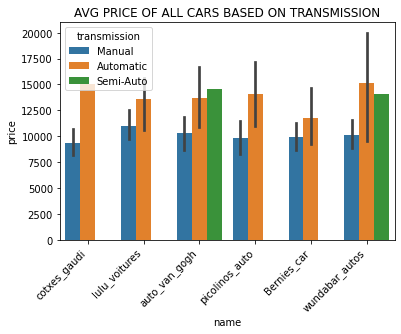

In [15]:
chart = sns.barplot(data = df,x = 'name', y = 'price', hue = 'transmission')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title ('AVG PRICE OF ALL CARS BASED ON TRANSMISSION')
plt.show()

In [16]:
sql_query = '''SELECT name,year,price,fuel_type FROM hyundai_cars
                ORDER BY name
                
                ;'''
df = pd.read_sql_query(sql_query,mydb)

df.head()

,name,year,price,fuel_type
0,I10,2016,6499,Petrol
1,I10,2015,6149,Petrol
2,I10,2018,7100,Petrol
3,I10,2016,7500,Petrol
4,I10,2016,8100,Petrol


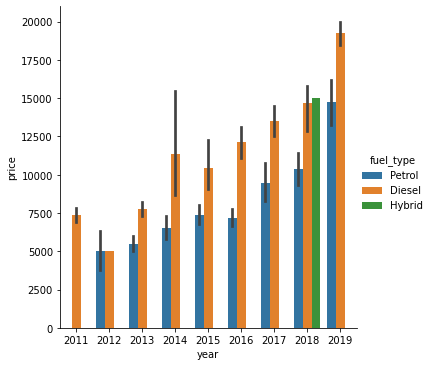

In [17]:
# price versus year of the diferent Fuel_type
sns.catplot(data = df,
                x = 'year',
                y = 'price',
                hue = 'fuel_type',kind='bar');

In [18]:
sql_query = '''SELECT name,fuel_type,engine_size FROM hyundai_cars
                WHERE engine_size < 1.5
                ORDER BY name                
                ;'''
df = pd.read_sql_query(sql_query,mydb)

df.head()

,name,fuel_type,engine_size
0,I10,Petrol,1.2
1,I10,Petrol,0.0
2,I10,Petrol,0.0
3,I10,Petrol,1.0
4,I10,Petrol,1.0


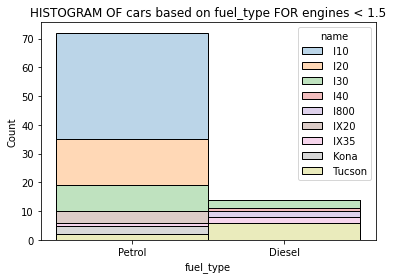

In [19]:
sns.histplot(data=df, x="fuel_type", hue="name", multiple="stack",alpha=0.3)
plt.title('hello')
plt.title ('HISTOGRAM OF cars based on fuel_type FOR engines < 1.5')
plt.show()

+ els cotxes petits fan servir gasolina normal

In [20]:
sql_query = '''SELECT c.name, c.price,c.engine_size, s.city FROM hyundai_cars AS c
                LEFT JOIN shops as s
                ON c.shop = s.id_shop                
                WHERE c.name LIKE '%Tuc%' OR c.name LIKE '%I30'
                
                ;'''
df = pd.read_sql_query(sql_query,mydb)

df.head()

,name,price,engine_size,city
0,Tucson,14499,2.0,Paris
1,Tucson,11399,1.7,Amsterdam
2,Tucson,14199,1.7,Paris
3,I30,10399,1.4,Amsterdam
4,Tucson,12163,1.7,Rome


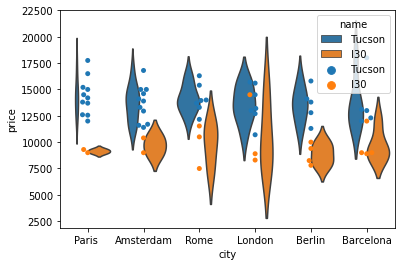

In [21]:
sns.violinplot(data=df, x= 'city',y='price',hue="name", inner=None)
sns.swarmplot(x="city", y="price", hue='name', data=df)
plt.show()

+ a Londres hi ha molta variacio en el preu del I30. Potser es que tenen cotxes nous i antics?

In [22]:
sql_query = '''SELECT c.name,c.year,c.price FROM hyundai_cars AS c
                LEFT JOIN shops as s
                ON c.shop = s.id_shop                
                WHERE c.name LIKE '%I30'
                AND s.city = 'London'
                
                ;'''
df = pd.read_sql_query(sql_query,mydb)

df.head()

,name,year,price
0,I30,2017,8300
1,I30,2019,14500
2,I30,2016,8900


In [23]:
mycursor.close()
# close session

True